# 서울시 CCTV 현황 데이터 분석

## 1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

In [4]:
import pandas as pd
import numpy as np

In [5]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t', thousands=',',
                 usecols = [1,3,6,9,13], skiprows=[0,1,2,3],
                  names =['자치구', '인구수', '내국인','외국인','고령인'])
pop

,자치구,인구수,내국인,외국인,고령인
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619
5,동대문구,364338,348052,16286,57165
6,중랑구,408147,403209,4938,61830
7,성북구,447687,435868,11819,67782
8,강북구,322915,319164,3751,58196
9,도봉구,341649,339413,2236,55964


In [6]:
pop['외국인 비율'] = pop['외국인']/pop['인구수'] * 100
pop['고령인 비율'] = pop['고령인']/pop['인구수'] * 100
pop.head(5)

,자치구,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


## 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서 '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [7]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx', encoding='utf-8')
cctv.head(5)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


## 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [8]:
# unique() : 리스트 형대로 보여준다
cctv['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [9]:
cctv['기관명'] = [x.replace(' ','') for x in cctv['기관명'].unique()]

In [10]:
cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [11]:
cctv.rename(columns = {'기관명':'자치구'}, inplace = True)
cctv.head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [12]:
#여러개 컬럼명 쓸때는 [[]]
cctv[['2011년 이전','2012년','2013년']] = cctv[['2011년 이전','2012년','2013년']].fillna(0).astype(int)


In [13]:
cctv


,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671
5,광진구,1581,470,42,83,87,64,21,468,346
6,구로구,3227,852,219,349,187,268,326,540,486
7,금천구,1634,27,17,242,101,382,136,199,530
8,노원구,1906,481,117,203,80,461,298,110,156
9,도봉구,858,197,66,8,185,59,155,117,71


In [14]:
cctv['2015년 이전'] = cctv['2011년 이전']+cctv['2012년']+cctv['2013년']+cctv['2014년']+cctv['2015년']
#cctv['2015년 이전'] = cctv[['2011년 이전','2012년','2013년','2014년','2015년']].sum()
#cctv['2015년 이전'] = cctv.iloc[:,2:7].sum(axis=1)
cctv['최근 3개년'] = cctv['2016년']+cctv['2017년']+cctv['2018년']
#cctv['최근 3개년'] = cctv.iloc[:,7:10].sum(axis=1)

cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984
5,광진구,1581,470,42,83,87,64,21,468,346,746,835
6,구로구,3227,852,219,349,187,268,326,540,486,1875,1352
7,금천구,1634,27,17,242,101,382,136,199,530,769,865
8,노원구,1906,481,117,203,80,461,298,110,156,1342,564
9,도봉구,858,197,66,8,185,59,155,117,71,515,343


In [15]:
cctv['최근 증가율'] = cctv['최근 3개년']/cctv['2015년 이전'] * 100
cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,52.171379
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,82.960078
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,83.068017
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,77.887789
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,99.150425
5,광진구,1581,470,42,83,87,64,21,468,346,746,835,111.930295
6,구로구,3227,852,219,349,187,268,326,540,486,1875,1352,72.106667
7,금천구,1634,27,17,242,101,382,136,199,530,769,865,112.483745
8,노원구,1906,481,117,203,80,461,298,110,156,1342,564,42.026826
9,도봉구,858,197,66,8,185,59,155,117,71,515,343,66.601942


## 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [16]:
del cctv['2011년 이전']

In [17]:
cctv

,자치구,소계,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,195,316,430,546,765,577,448,3431,1790,52.171379
1,강동구,1879,387,134,59,144,194,273,385,1027,852,82.960078
2,강북구,1265,88,141,74,145,254,1,319,691,574,83.068017
3,강서구,1617,155,118,230,187,190,264,254,909,708,77.887789
4,관악구,3985,56,419,487,609,619,694,671,2001,1984,99.150425
5,광진구,1581,42,83,87,64,21,468,346,746,835,111.930295
6,구로구,3227,219,349,187,268,326,540,486,1875,1352,72.106667
7,금천구,1634,17,242,101,382,136,199,530,769,865,112.483745
8,노원구,1906,117,203,80,461,298,110,156,1342,564,42.026826
9,도봉구,858,66,8,185,59,155,117,71,515,343,66.601942


In [18]:
cctv = cctv.drop(['2012년','2013년','2014년','2015년','2016년','2017년','2018년','2015년 이전','최근 3개년'], axis=1)
#inplace=Ture
cctv

,자치구,소계,최근 증가율
0,강남구,5221,52.171379
1,강동구,1879,82.960078
2,강북구,1265,83.068017
3,강서구,1617,77.887789
4,관악구,3985,99.150425
5,광진구,1581,111.930295
6,구로구,3227,72.106667
7,금천구,1634,112.483745
8,노원구,1906,42.026826
9,도봉구,858,66.601942


## 8. 서울시 인구 데이터와 cctv 데이터를 합친다.

In [19]:
result = pd.merge(cctv, pop, left_on='자치구', right_on='자치구',
                        how='inner')
#result = pd.merge(cctv, pop, on ='자치구')
result.head(5)

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율
0,강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970


In [20]:
result.set_index('자치구')
result.head()

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율
0,강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970


## 9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

### - 자치구별 cctv갯수(bar graph)

In [21]:
# 한글 폰트 사용(Matplotlib사용 전 기본 설정해주기)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'Malgun Gothic')
mpl.rcParams['figure.figsize']=(12,10)
mpl.rcParams['font.size']=14

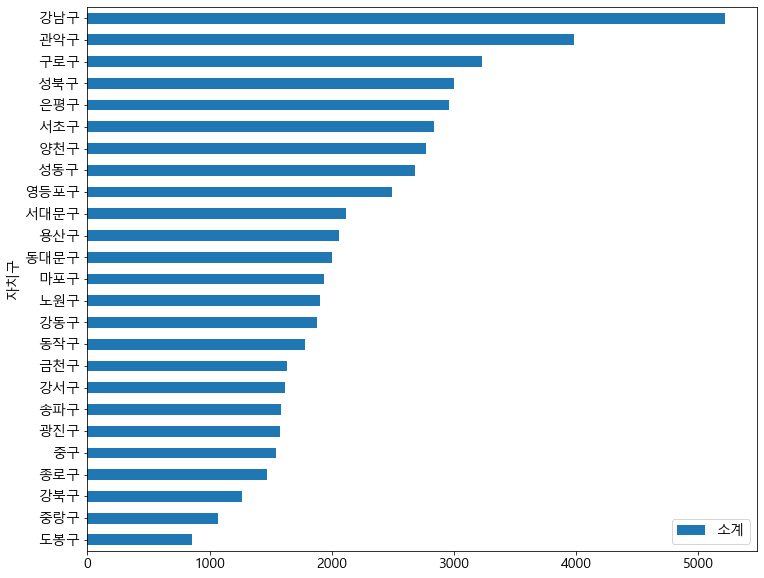

In [22]:
df = result.iloc[:,0:2]
df = df.set_index('자치구')
df = df.sort_values(by=['소계'])
df.plot(kind='barh')
plt.show()

### - 자치구별 인당 cctv 갯수(bar graph)

In [23]:

result['인당 cctv갯수'] = result['소계'] / result['인구수']
df

,소계
자치구,
도봉구,858
중랑구,1068
강북구,1265
종로구,1471
중구,1544
광진구,1581
송파구,1586
강서구,1617
금천구,1634


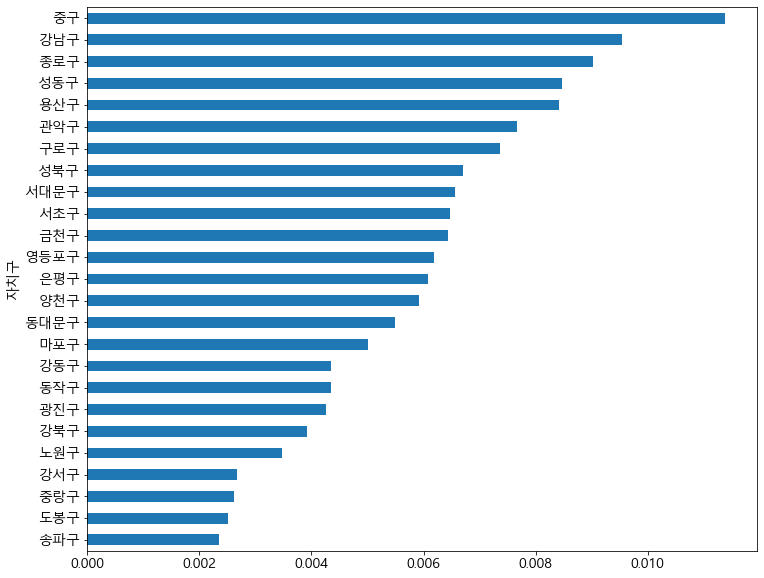

In [24]:
df=result.set_index('자치구')
df['인당 cctv갯수'].sort_values().plot(kind='barh')
plt.show()

### - 인구수의 cctv 댓수의 산점도

### - 인구수의 cctv 댓수의 산점도 및 회귀선

In [25]:
fp1 = np.polyfit(df['인구수'],df['소계'],1)
fp1
#array([기울기, y절편])

array([2.85240371e-03, 1.07309855e+03])

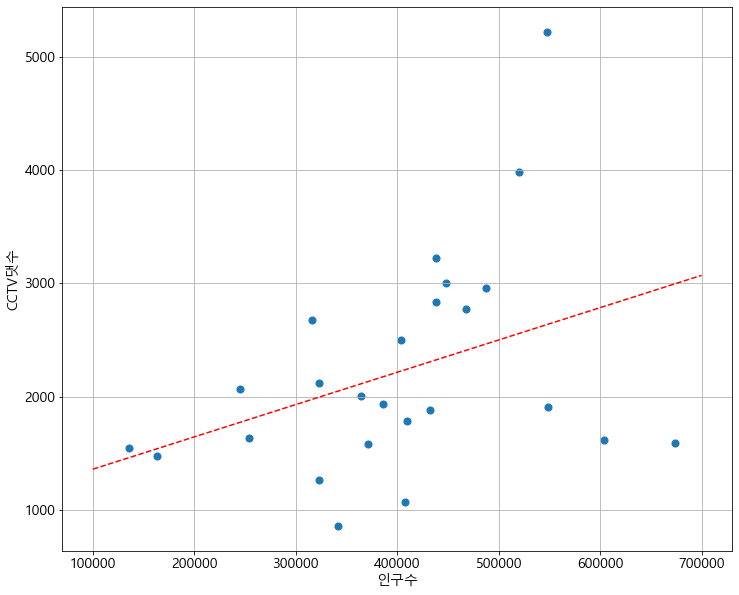

In [26]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)

plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'],s=50)
plt.plot(fx,f1(fx), ls ='dashed', color = 'red' )
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

### - 인구수의 CCTV 댓수의 산점도, 회귀선 및 자치구명

In [34]:
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율,인당 cctv갯수
자치구,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537
강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686,0.004350
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663


In [37]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율,인당 cctv갯수,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537,2586.344483
강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686,0.004350,426.108759
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917,729.182492
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679,1177.840805
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663,1428.537426


In [40]:
df_sort = df.sort_values(by = ['오차'], ascending = False)
df_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령인,외국인 비율,고령인 비율,인당 cctv갯수,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537,2586.344483
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663,1428.537426
송파구,1586,62.833676,673507,666635,6872,81364,1.020331,12.080647,0.002355,1408.212414
도봉구,858,66.601942,341649,339413,2236,55964,0.654473,16.380554,0.002511,1189.619423
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679,1177.840805
중랑구,1068,22.477064,408147,403209,4938,61830,1.209858,15.148954,0.002617,1169.298565
구로구,3227,72.106667,438486,404497,33989,61801,7.751445,14.094179,0.007359,903.162358
노원구,1906,42.026826,548160,543752,4408,77096,0.804145,14.064507,0.003477,730.672166
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917,729.182492


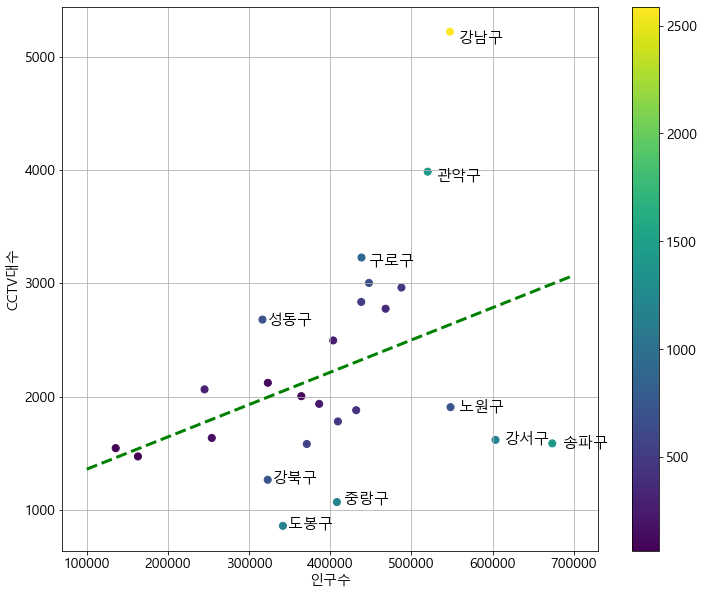

In [49]:
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw =3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.colorbar()
plt.grid()
plt.show()

### - 고령자 비율 vs 인당 CCTV

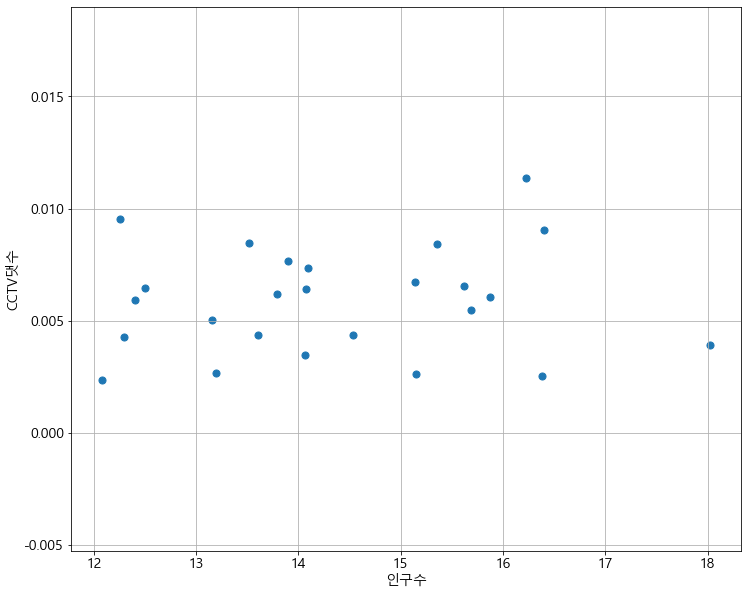

In [66]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)

plt.figure(figsize=(12,10))
plt.scatter(df['고령인 비율'], df['인당 cctv갯수'],s=50)
plt.plot(fx,f1(fx), ls ='dashed', color = 'red' )
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

### - 외국인 비율 vs 인당 CCTV

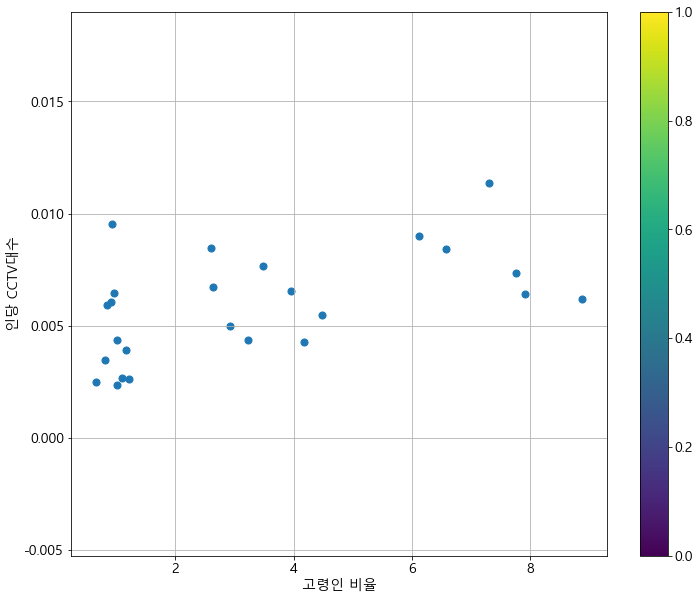

In [57]:
plt.scatter(df['외국인 비율'], df['인당 cctv갯수'], s = 50)
#plt.plot(fx, f1(fx), ls = 'dashed', lw =3, color = 'g')

plt.xlabel('고령인 비율')
plt.ylabel('인당 CCTV대수')
plt.colorbar()
plt.grid()
plt.show()

In [27]:
import requests as rq

In [61]:
url = "https://pjt3591oo.github.io/"
res = rq.get(url)
print(res)
print(res.status_code)

<Response [200]>
200


In [62]:
def url_check(url):
    res = rq.get(url)
    print(res)
    sc = res.status_code
    
    if sc ==200:
        print("%s 요청 성공" %url)
    elif sc == 404:
        print("%s 찾을 수 없음" %url)
    else:
        print("%s 알 수 없느느 에러 : %s" %(url, sc))

url_check("https://pjt3591oo.github.io//a")
url_check("https://pjt3591oo.github.io/")

<Response [404]>
https://pjt3591oo.github.io//a 찾을 수 없음
<Response [200]>
https://pjt3591oo.github.io/ 요청 성공


In [63]:
print(res.text)

<!DOCTYPE html>
<html lang="en">

  <head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">

  <title>Home</title>
  <meta name="description" content="멍개의 개발 블로그입니다. 궁금하신 사항 혹은 전달하고 싶은 내용이 있으시면 메일로 문의 주세요.">

  <link rel="stylesheet" href="/assets/main.css">
  <link rel="canonical" href="/">
  <link rel="alternate" type="application/rss+xml" title="Home" href="/feed.xml">
  
  
</head>


  <body>

    <header class="site-header" role="banner">

  <div class="wrapper">
    
    
    <a class="site-title" href="/">Home</a>
  
    
      <nav class="site-nav">
        <input type="checkbox" id="nav-trigger" class="nav-trigger" />
        <label for="nav-trigger">
          <span class="menu-icon">
            <svg viewBox="0 0 18 15" width="18px" height="15px">
              <path fill="#424242" d="M18,1.484c0,0.82-0.665,1.484-1.484,1.484H1.484C0.665,2.969,0,2.304,0,1.484l0,0C0,0.665,0.6

In [64]:
print(res.content)

b'<!DOCTYPE html>\n<html lang="en">\n\n  <head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n\n  <title>Home</title>\n  <meta name="description" content="\xeb\xa9\x8d\xea\xb0\x9c\xec\x9d\x98 \xea\xb0\x9c\xeb\xb0\x9c \xeb\xb8\x94\xeb\xa1\x9c\xea\xb7\xb8\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4. \xea\xb6\x81\xea\xb8\x88\xed\x95\x98\xec\x8b\xa0 \xec\x82\xac\xed\x95\xad \xed\x98\xb9\xec\x9d\x80 \xec\xa0\x84\xeb\x8b\xac\xed\x95\x98\xea\xb3\xa0 \xec\x8b\xb6\xec\x9d\x80 \xeb\x82\xb4\xec\x9a\xa9\xec\x9d\xb4 \xec\x9e\x88\xec\x9c\xbc\xec\x8b\x9c\xeb\xa9\xb4 \xeb\xa9\x94\xec\x9d\xbc\xeb\xa1\x9c \xeb\xac\xb8\xec\x9d\x98 \xec\xa3\xbc\xec\x84\xb8\xec\x9a\x94.">\n\n  <link rel="stylesheet" href="/assets/main.css">\n  <link rel="canonical" href="/">\n  <link rel="alternate" type="application/rss+xml" title="Home" href="/feed.xml">\n  \n  \n</head>\n\n\n  <body>\n\n    <header class="site-header" r

In [70]:
import bs4
from pprint import pprint
import requests

In [71]:
html = requests.get('https://search.naver.com/search.naver?query=날씨')
pprint(html.text)

('<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta '
 'name="referrer" content="always">  <meta name="format-detection" '
 'content="telephone=no,address=no,email=no"> <meta name="viewport" '
 'content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta '
 'property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" '
 'content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta '
 'property="og:description" content="\'날씨\'의 네이버 통합검색 결과입니다."> <meta '
 'name="description" lang="ko" content="\'날씨\'의 네이버 통합검색 결과입니다."> <title>날씨 : '
 '네이버 통합검색</title> <link rel="shortcut icon" '
 'href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  '
 '<link rel="search" type="application/opensearchdescription+xml" '
 'href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" '
 'title="Naver" /><link rel="stylesheet" type="text/css" '
 'href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200528.

 'class="thumb_area " id="kdic_thumb_3"> <a target="_blank" '
 'href="https://terms.naver.com/entry.nhn?docId=5749771&cid=51641&categoryId=63816" '
 'class="link_thumb" onclick="return '
 'goOtherCR(this,\'a=kdc_gnl*g.thumb&r=3&i=98186967_00000000205201699ed67747&u=\'+urlencode(this.href));"> '
 '<img '
 'src="https://search.pstatic.net/common/?src=https%3A%2F%2Fphinf.pstatic.net%2Ftvcast%2F20190311_11%2FuMI2A_1552276836907VWjeT_JPEG%2F2163f77a-43b2-11e9-8fbe-505dac8c38f5_03.jpg%231920x1080%23m&type=mfullfill160_160" '
 'onload="this.parentNode.className=\'link_thumb\';" '
 'onerror="this.parentNode.style.display=\'none\';" width="80" height="80" '
 'class="thumb" alt=""><span class="thumb_bd"></span><span class="spkindic '
 'ico_video">동영상</span></a> </div> <div class="info_area"> <div '
 'class="tit_box"> <a target="_blank" '
 'href="https://terms.naver.com/entry.nhn?docId=5749771&cid=51641&categoryId=63816" '
 'class="tit " onclick="return '
 'goOtherCR(this,\'a=kdc_gnl*g.title&r=3&

In [73]:
soup = bs4.BeautifulSoup(html.text, 'html.parser')

In [75]:
data1 = soup.find('div', {'class':'weather_box'})

In [76]:
find_address = data1.find('span', {'class':'btn_select'}).text
print('현재 위치: '+find_address)

현재 위치: 대전광역시 서구 둔산3동


In [77]:
find_currenttemp = data1.find('span', {'class':'todaytemp'}).text
print('현재 온도: '+find_currenttemp+'도')

현재 온도: 33도


In [78]:
data2 = data1.findAll('dd')